<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Фиксируем сиды, чтобы результат был одинаковый при новых запусках`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
#1
df_train.sample(10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

In [4]:
#2
df_test

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                      ...   ...            ...        ...   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner     mileage   engine  \
0    Diesel  Individual       Manual   First Owner   14.0 kmpl  2498 CC   
1    Diesel  Individual       Manual   First Owner   21.5 kmpl  1497 CC   
2    Petrol  Individual    Automatic   First Owner   12.9 kmpl  1799 CC   
3    Diesel  Individual       Manual   First Owner   25.1 kmpl  1498 CC   
4    Petrol  Individual       Manual  Second Owner   16.5 kmpl  1172 CC   
..      ...         ...          ...           ...         ...      ...   
995  Petrol  Individual       Manual  Second Owner  19.81 kmpl  1086 CC   
996  Petrol  Individual       Manual  Second Owner   18.6 kmpl  1197 CC   
997  Diesel  Individual       Manual   First Owner   23.0 kmpl  1396 CC   
998  Petrol  Individual       Manual   First Owner  20.36 kmpl  1197 CC   
999  Diesel  Individual       Manual   First Owner   26.0 kmpl  1498 CC   

     max_power                    torque  seats  
0      112 bhp   260 Nm at 1800-2200 rpm    7.0  
1    108.5 bhp       260Nm@ 1500-2750rpm    5.0  
2      130 bhp            172Nm@ 4300rpm    5.0  
3     98.6 bhp            200Nm@ 1750rpm    5.0  
4       65 bhp      96  Nm at 3000  rpm     5.0  
..         ...                       ...    ...  
995  68.05 bhp          99.04Nm@ 4500rpm    5.0  
996  81.83 bhp          114.7Nm@ 4000rpm    5.0  
997     90 bhp  22.4 kgm at 1750-2750rpm    5.0  
998   78.9 bhp          111.8Nm@ 4000rpm    5.0  
999   98.6 bhp            200Nm@ 1750rpm    5.0  

[1000 rows x 13 columns]

In [5]:
#3
# для трейна
colnames = df_train.isna().any()[df_train.isna().any() == True].index
df_train.isna().any()[df_train.isna().any() == True].index

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

In [6]:
# для теста
df_test.isna().any()[df_test.isna().any() == True].index

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

In [7]:
#4
df_train.duplicated().any()

True

In [8]:
#на тесте
df_test.duplicated().any()

True

In [ ]:
#5 Бонус
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_train, title="Profiling Report")
profile_test = ProfileReport(df_test, title="Profiling Report Test")

Вот это прям круто! :D Оставлю профиль только для train

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("report_train.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [9]:
import re

In [10]:
f = list(colnames)
f.remove('torque')

In [11]:
d = {}
for i in f:
  median = [float(i) for i in list(map((lambda x: ''.join(re.findall(r'[\d\.-]', str(x)))), df_train[i])) if i != '']
  d[i] = np.median(median)

In [12]:
d['mileage'] = str(d['mileage'])+ ' kmpl'
d['engine'] = str(int((d['engine'])))+ ' CC'
d['max_power'] = str(d['max_power'])+ ' bhp'

In [13]:
for i in d:
  df_train[i].fillna(d[i], inplace = True)
  df_test[i].fillna(d[i], inplace = True)

<ipython-input-13-5b6a8c4185d0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[i].fillna(d[i], inplace = True)
<ipython-input-13-5b6a8c4185d0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [14]:
df_train.replace({'max_power':{' bhp':d['max_power']}}, inplace = True)
df_test.replace({'max_power':{' bhp':d['max_power']}}, inplace = True)

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [15]:
#1
df_train[df_train.drop('selling_price', axis = 1).duplicated()]['name'].count()

1159

In [16]:
#2
df_train[df_train.drop('selling_price', axis = 1).duplicated()]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
268       70000  Petrol  Individual       Manual  Second Owner   19.1 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
...         ...     ...         ...          ...           ...         ...   
6947      60000  Petrol  Individual       Manual  Second Owner   18.0 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
268   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
...       ...         ...                  ...    ...  
6947   995 CC      62 bhp      90.3Nm@ 4200rpm    5.0  
6984  1498 CC   98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 13 columns]

In [17]:
cols = list(df_train.columns)
cols.remove('selling_price')

In [18]:
df_train.drop_duplicates(subset = cols,keep = 'first', inplace = True, ignore_index = True)

In [19]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [20]:
df_train.drop('torque',axis = 1, inplace = True)
df_test.drop('torque',axis = 1, inplace = True)

In [21]:
f.remove('seats')

In [ ]:
#тут вычисляла точечную ошибку, которую обработала в заполнении нанов
#p = pd.DataFrame(list(map((lambda x: ''.join(re.findall(r'[\d\.-]*', str(x)))), df_train['max_power'])))
#df_train['max_power'][3586]


In [22]:
for i in f:
  df_train[i] = [float(j) for j in list(map((lambda x: ''.join(re.findall(r'[\d\.-]', str(x)))), df_train[i]))]
  df_test[i] = [float(j) for j in list(map((lambda x: ''.join(re.findall(r'[\d\.-]', str(x)))), df_test[i]))]

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [23]:
for i in ['engine','seats']:
  df_train[i] = df_train[i].astype(int)
  df_test[i] = df_test[i].astype(int)


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [24]:
#Общая таблица для всех столбцов в train
df_train.describe(include = 'all')

name         year  selling_price     km_driven  \
count                     5840  5840.000000   5.840000e+03  5.840000e+03   
unique                    1924          NaN            NaN           NaN   
top     Maruti Swift Dzire VDI          NaN            NaN           NaN   
freq                        91          NaN            NaN           NaN   
mean                       NaN  2013.428425   5.229601e+05  7.395224e+04   
std                        NaN     4.095622   5.354320e+05  6.007114e+04   
min                        NaN  1983.000000   2.999900e+04  1.000000e+00   
25%                        NaN  2011.000000   2.500000e+05  3.900000e+04   
50%                        NaN  2014.000000   4.050000e+05  7.000000e+04   
75%                        NaN  2017.000000   6.400000e+05  1.000000e+05   
max                        NaN  2020.000000   1.000000e+07  2.360457e+06   

          fuel seller_type transmission        owner      mileage  \
count     5840        5840         5840         5840  5840.000000   
unique       4           3            2            5          NaN   
top     Diesel  Individual       Manual  First Owner          NaN   
freq      3177        5223         5336         3603          NaN   
mean       NaN         NaN          NaN          NaN    19.428611   
std        NaN         NaN          NaN          NaN     3.986026   
min        NaN         NaN          NaN          NaN     0.000000   
25%        NaN         NaN          NaN          NaN    16.950000   
50%        NaN         NaN          NaN          NaN    19.300000   
75%        NaN         NaN          NaN          NaN    22.300000   
max        NaN         NaN          NaN          NaN    42.000000   

             engine    max_power        seats  
count   5840.000000  5840.000000  5840.000000  
unique          NaN          NaN          NaN  
top             NaN          NaN          NaN  
freq            NaN          NaN          NaN  
mean    1429.448973    87.910782     5.426712  
std      485.662834    31.639585     0.982344  
min      624.000000     0.000000     2.000000  
25%     1197.000000    68.000000     5.000000  
50%     1248.000000    81.860000     5.000000  
75%     1498.000000    99.000000     5.000000  
max     3604.000000   400.000000    14.000000

In [25]:
#Общая таблица для всех столбцов в test
df_test.describe(include = 'all')

name         year  selling_price      km_driven  \
count                  1000  1000.000000   1.000000e+03    1000.000000   
unique                  621          NaN            NaN            NaN   
top     Maruti Alto 800 LXI          NaN            NaN            NaN   
freq                     15          NaN            NaN            NaN   
mean                    NaN  2013.681000   6.179010e+05   71393.341000   
std                     NaN     4.012149   7.585539e+05   48486.218662   
min                     NaN  1995.000000   3.100000e+04    1303.000000   
25%                     NaN  2011.000000   2.500000e+05   37000.000000   
50%                     NaN  2014.000000   4.349990e+05   61500.000000   
75%                     NaN  2017.000000   6.700000e+05  100000.000000   
max                     NaN  2020.000000   6.000000e+06  375000.000000   

          fuel seller_type transmission        owner      mileage      engine  \
count     1000        1000         1000         1000  1000.000000  1000.00000   
unique       4           3            2            5          NaN         NaN   
top     Diesel  Individual       Manual  First Owner          NaN         NaN   
freq       534         837          877          623          NaN         NaN   
mean       NaN         NaN          NaN          NaN    19.337480  1454.87600   
std        NaN         NaN          NaN          NaN     3.951751   521.99574   
min        NaN         NaN          NaN          NaN     0.000000   624.00000   
25%        NaN         NaN          NaN          NaN    16.550000  1197.00000   
50%        NaN         NaN          NaN          NaN    19.300000  1248.00000   
75%        NaN         NaN          NaN          NaN    22.300000  1582.00000   
max        NaN         NaN          NaN          NaN    32.260000  3604.00000   

          max_power        seats  
count   1000.000000  1000.000000  
unique          NaN          NaN  
top             NaN          NaN  
freq            NaN          NaN  
mean      90.844330     5.403000  
std       34.892709     0.912921  
min       34.200000     4.000000  
25%       69.000000     5.000000  
50%       82.425000     5.000000  
75%      102.000000     5.000000  
max      280.000000     9.000000

Столбец torque был удален, поэтому тест на размерность не проходит

In [ ]:
assert df_train.shape == (5840, 13)

AssertionError: 

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

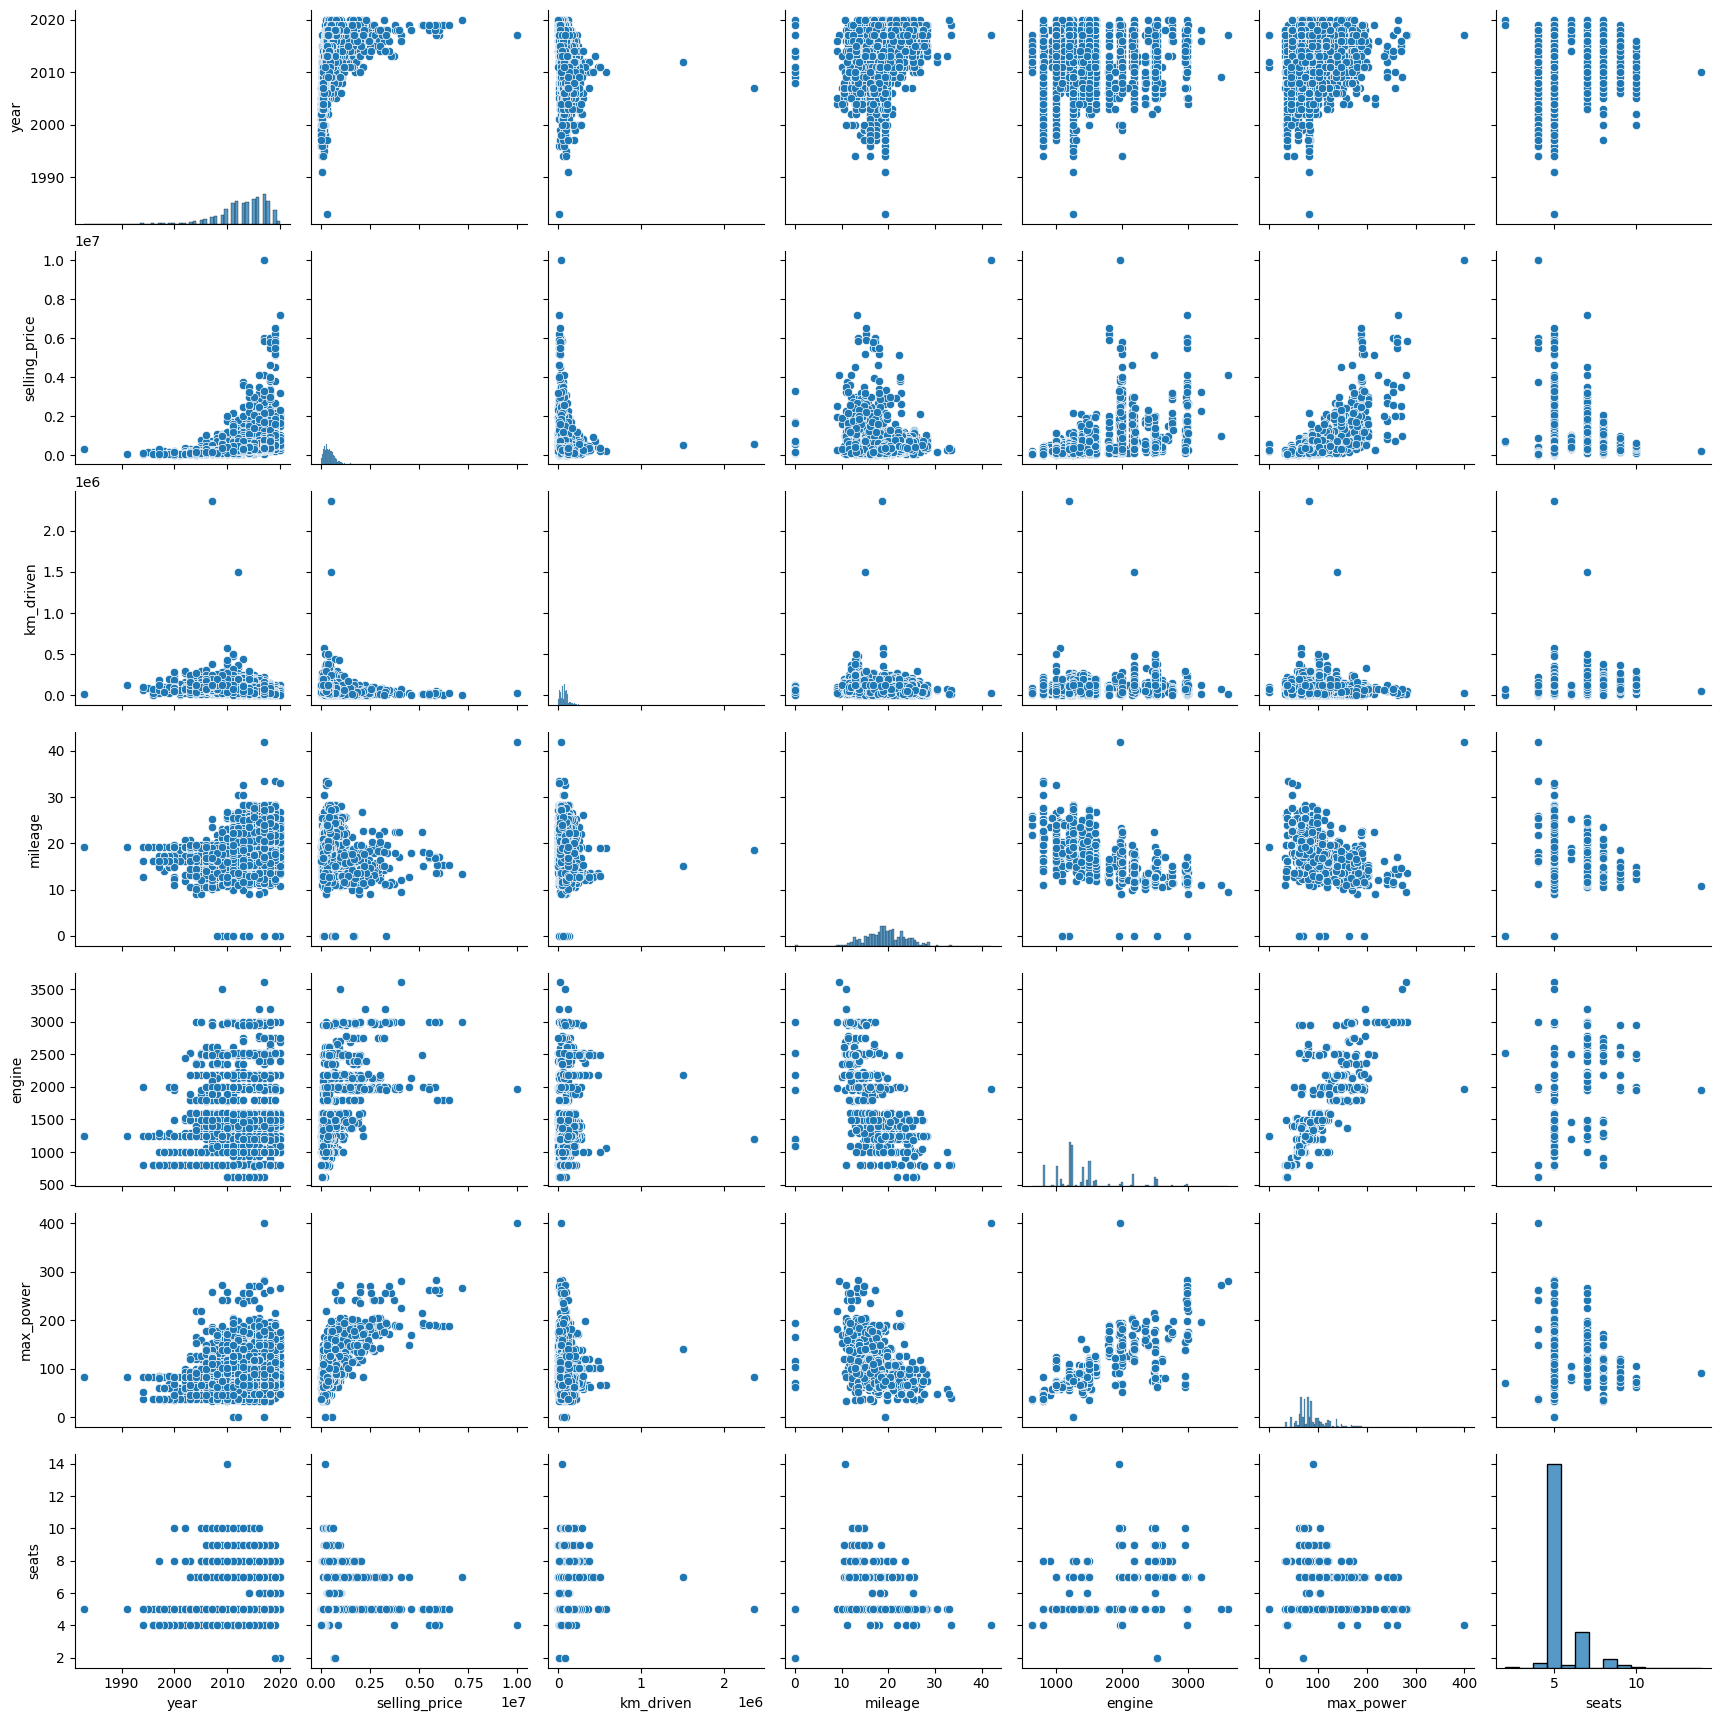

In [ ]:
sns.pairplot(df_train)

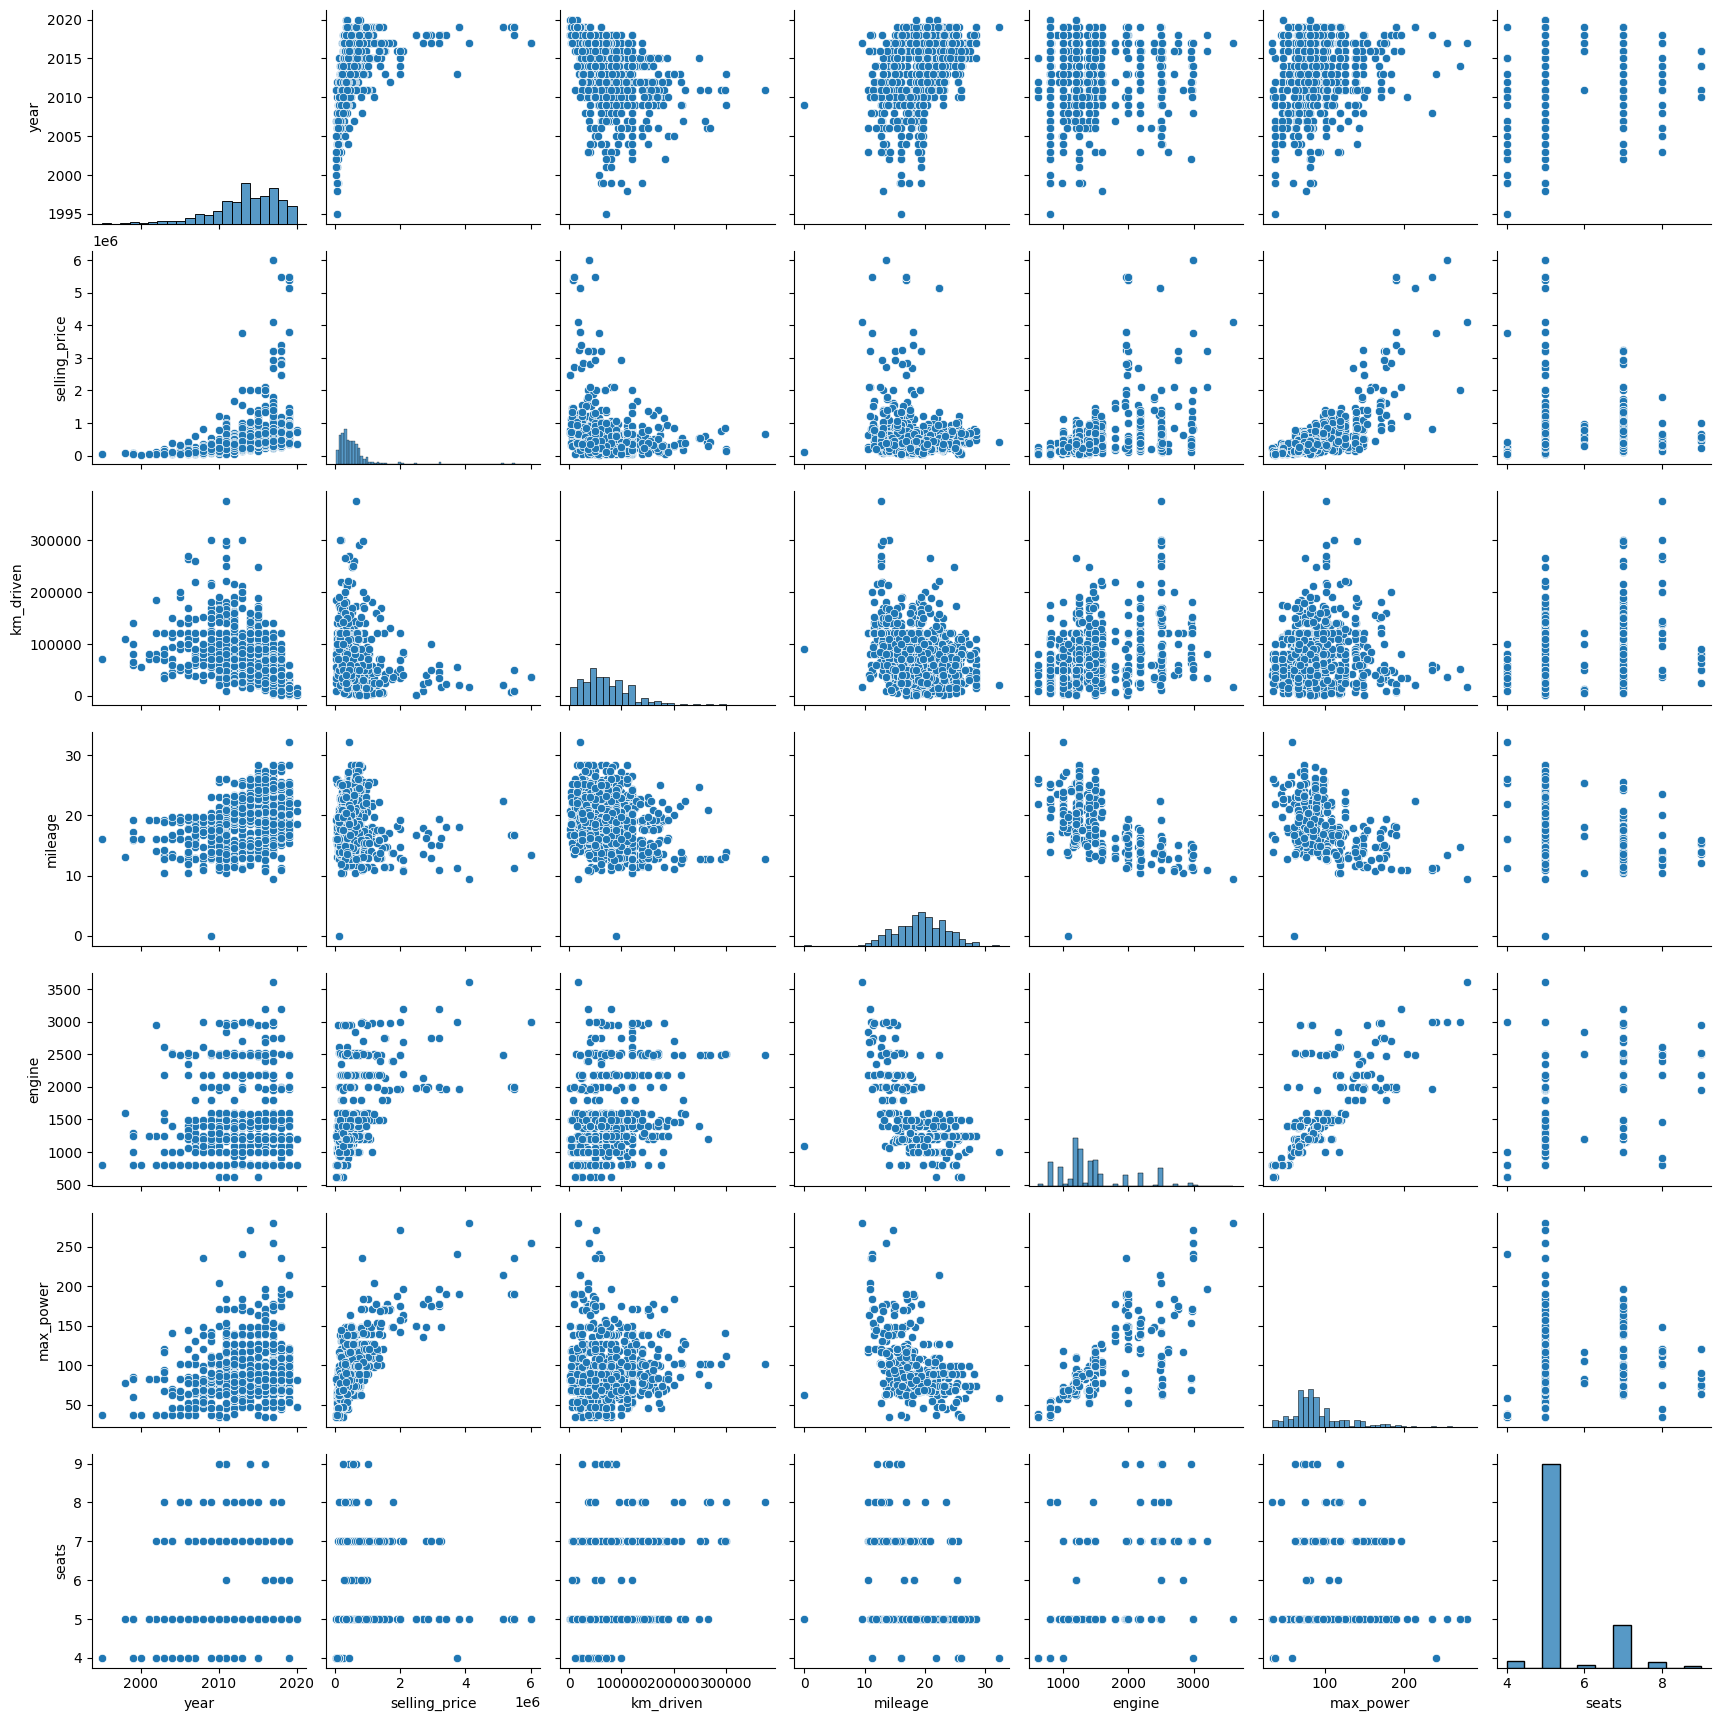

In [ ]:
sns.pairplot(df_test)

`Your answer here`

Шаг 1.

1.1. Можно различить некоторую линейную зависимость между целевой переменной и такими показателями как engine и max power. На графиках видно, что чем выше значение этих показателей, тем больше становится selling_price. Также заметно, что с годами стоимоть автомобилей в целом растет.

1.2. Можно условно предположить характер зависимости и ее степень: так для year, engine, max_power, seats корреляция будет положительной и скорее всего самой большой по модулю. Для остальных она будет отрицательной, и для mileage она вероятно будет наименьшей.

Шаг 2.

2.1. Распределение самих признаков оказалось приблизительно схожим (смотрю по barchart). Такой же вывод можно сделать о связи целевой переменной с признаками - характер связи не изменился.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [26]:
matrix = df_train.corr(numeric_only = True)
matrix

year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.342172  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.104458  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.182245  0.229766   
mileage        0.342172      -0.104458  -0.182245  1.000000 -0.572677   
engine         0.002819       0.447672   0.229766 -0.572677  1.000000   
max_power      0.156648       0.692754   0.024630 -0.373271  0.681082   
seats          0.041178       0.149953   0.192328 -0.450810  0.652172   

               max_power     seats  
year            0.156648  0.041178  
selling_price   0.692754  0.149953  
km_driven       0.024630  0.192328  
mileage        -0.373271 -0.450810  
engine          0.681082  0.652172  
max_power       1.000000  0.244060  
seats           0.244060  1.000000

<Axes: >

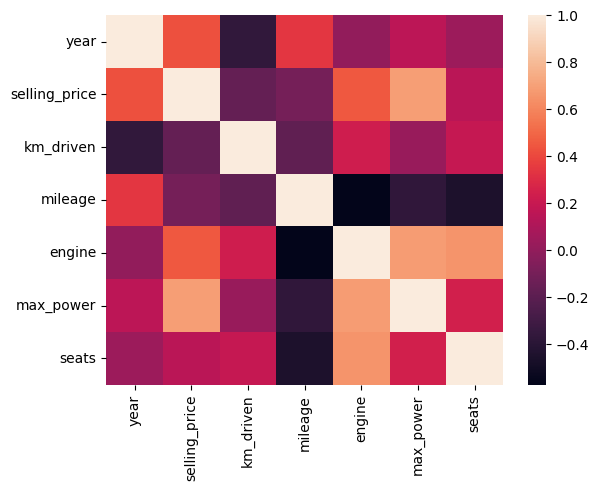

In [27]:
sns.heatmap(matrix)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Your answer here`

1. Менеее всего скоррелированы engine и year
2. Сильная положительная связь наблюдается между selling_price - engine; engine - max_power, seats - engine, selling_price - max_power, year - selling_price
3. Такое утверждение имеет место быть, коэффициент Пирсона отрицательный, что сигнализирует об обратной связи, и по модулю немалый, однако недостаточно высокий, чтобы утверждение имело массовый характер для объектов в датасете

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

В рамках EDA мы не коснулись вопроса выбросов. Boxplot позволит увидеть, есть ли выбросы в целевой переменной. По итогу в зависимости от задачи их можно либо оставить, либо обработать (выкинуть и тд).

<Axes: ylabel='selling_price'>

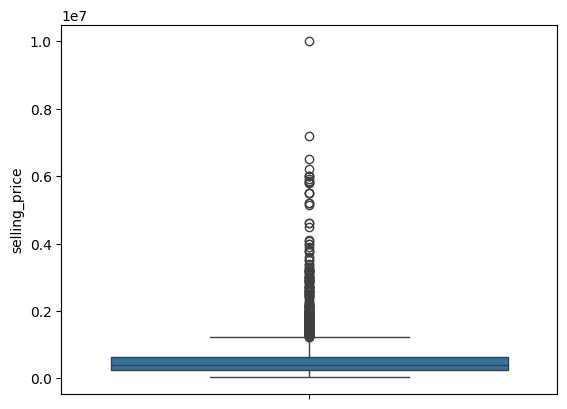

In [ ]:
sns.boxplot(df_train['selling_price'])

Видно, что какая-то стоимость какой-то части объектов действительно подпадает под выбросы

Также мы не посмотрели на распределение категориальных переменных и как selling_price распределяется в зависимости от них.

<Axes: xlabel='owner', ylabel='Count'>

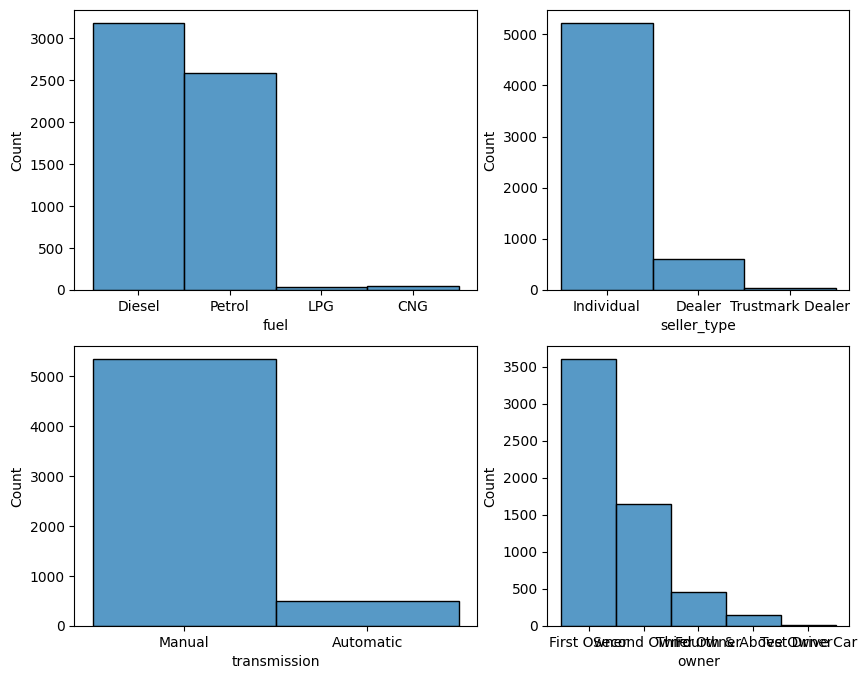

In [ ]:
f, axs = plt.subplots(2, 2, figsize=(10, 8), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(data=df_train['fuel'], ax = axs[0,0])
sns.histplot(data=df_train['seller_type'], ax = axs[0,1])
sns.histplot(data=df_train['transmission'], ax = axs[1,0])
sns.histplot(data=df_train['owner'], ax = axs[1,1])

Исходя из распределения категориальных переменных видно, что в датасете есть перекос в сторону определенных значений. Потенциально это может быть риском в обучении, когда какие-то значения в переменных представлены слабо.

<Axes: xlabel='owner', ylabel='selling_price'>

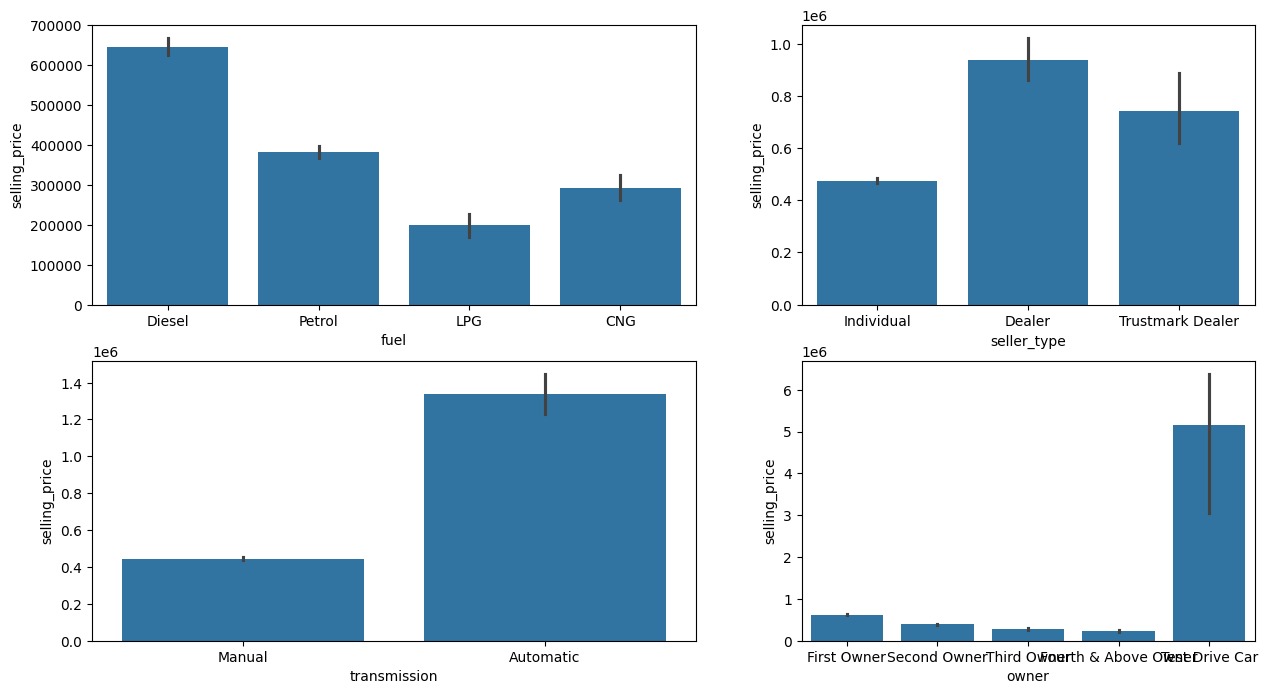

In [ ]:
f, axs = plt.subplots(2, 2, figsize=(15, 8), gridspec_kw=dict(width_ratios=[4, 3]))
sns.barplot(data=df_train, x="fuel", y="selling_price", ax = axs[0,0])
sns.barplot(data=df_train, x="seller_type", y="selling_price", ax = axs[0,1])
sns.barplot(data=df_train, x="transmission", y="selling_price", ax = axs[1,0])
sns.barplot(data=df_train, x="owner", y="selling_price", ax = axs[1,1])

Для определенных категорий selling_price гораздо выше, чем для остальных (как в случае с критерием owner и transmission) - эти признако возможно будут более информативны при предсказании стоимости автомобиля.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [28]:
df_train_num = df_train.select_dtypes('number').copy()
df_test_num = df_test.select_dtypes('number').copy()

In [29]:
y_train = df_train_num['selling_price']
X_train = df_train_num.drop('selling_price', axis = 1)

In [30]:
assert X_train.shape == (5840, 6)

In [31]:
y_test = df_test_num['selling_price']
X_test =  df_test_num.drop('selling_price', axis = 1)

In [32]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model1 = LinearRegression()

model1.fit(X_train, y_train)
pred = model1.predict(X_test)

print(r2_score(y_test,pred))
print(MSE(y_test,pred))

0.5941441219017134
233297548204.61063


Значение R2 в 0,6 говорит о среднем качестве обученной модели. То есть 0.6 от общей дисперсии таргета объяснена моделью. Для трактовки MSE сравним данное предсказание с MSE от использования среднего обучающей выборки.

In [34]:
print(MSE(y_test,[y_train.mean()]*len(y_test)))

583842339797.0208


Судя по полученному MSE, ошибка модели меньше, чем ошибка на среднем - говорит о лучшей предсказательной способности модели

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [35]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
scaler = normalizer.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
model = LinearRegression()

model.fit(X_train_norm, y_train)
pred2 = model.predict(X_test_norm)

print(r2_score(y_test,pred2))
print(MSE(y_test,pred2))

0.5941441219017262
233297548204.6033


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [ ]:
model.coef_

array([152843.26235772, -44148.04751104,  28781.08659475,  61176.85714999,
       322779.70323584, -23220.5702262 ])

Наиболее информативным оказался max_power

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train_norm, y_train)
pred3 = model.predict(X_test_norm)
print(r2_score(y_test,pred3))
print(MSE(y_test,pred3))

0.5941429546560312
233298219170.76022


In [ ]:
model.coef_

array([152843.08385345, -44146.91853785,  28779.20408499,  61172.02578008,
       322780.58619708, -23217.69327311])

Регуляризация по умолчанию не занулила никакие веса, так как дефолтное значение барьера для значения равно 1, что сильно меньше, чем веса параметров в текущей модели

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
alpha_range = np.arange(1, 9000, 100)
alpha_range

array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001,
       1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901, 2001, 2101,
       2201, 2301, 2401, 2501, 2601, 2701, 2801, 2901, 3001, 3101, 3201,
       3301, 3401, 3501, 3601, 3701, 3801, 3901, 4001, 4101, 4201, 4301,
       4401, 4501, 4601, 4701, 4801, 4901, 5001, 5101, 5201, 5301, 5401,
       5501, 5601, 5701, 5801, 5901, 6001, 6101, 6201, 6301, 6401, 6501,
       6601, 6701, 6801, 6901, 7001, 7101, 7201, 7301, 7401, 7501, 7601,
       7701, 7801, 7901, 8001, 8101, 8201, 8301, 8401, 8501, 8601, 8701,
       8801, 8901])

In [ ]:
from sklearn.model_selection import GridSearchCV

model = Lasso()
#param = {'alpha':[1,5,10,100,150,200]}
param = {'alpha':alpha_range}

clf = GridSearchCV(model, param_grid = param, cv=10, scoring='r2')
clf.fit(X_train_norm, y_train)
pred4 = clf.predict(X_test_norm)
print(clf.best_params_)
r2_score(y_test,pred4)

{'alpha': 8901}


0.5827364717975867

In [ ]:
model = Lasso(alpha = clf.best_params_['alpha'])
model.fit(X_train_norm, y_train)
model.coef_

array([151501.79933399, -34113.70803066,  11908.50881969,  20556.64465414,
       329542.13743868,     -0.        ])

1. Грид серч обучил 10 * на кол-во параметров для перебора (len(alpha_range) = 90) = 900 моделей
2. Коэффициент = 8901, занулились веса у последнего параметра. При этом r2 на тесет ухудшился.

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet()
parametersGrid = {"alpha": [0.1,1,100, 1000, 1500, 3000, 5000, 8500, 9000],
                  "l1_ratio": np.arange(0.0, 1.0, 0.5)}
grid = GridSearchCV(regr, parametersGrid, scoring='r2', cv=10)
grid.fit(X_train_norm, y_train)
pred5 = grid.predict(X_test_norm)
print(grid.best_params_)
r2_score(y_test,pred5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.804e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.523e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

{'alpha': 0.1, 'l1_ratio': 0.0}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.767e+14, tolerance: 1.674e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


0.5722341480525386

In [ ]:
r2_score(y_test,pred5)

0.5722341480525386

1. Грид серч обучил 10*кол-во параметров = 10 * 9 * 3 = 270 моделей
2. По R2 лучшие гиперпараметры: alpha = 0.1 и l1_ratio = 0

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [ ]:
df_train.drop('name', axis = 1, inplace = True)
df_test.drop('name', axis = 1, inplace = True)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
assert X_train_cat.shape == (5840, 10)

NameError: name 'X_train_cat' is not defined

In [ ]:
X_train_cat.describe(include='object')

NameError: name 'X_train_cat' is not defined

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
for_enc = df_train[['fuel','seller_type','transmission','owner','seats']]
for_enc_test = df_test[['fuel','seller_type','transmission','owner','seats']]

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
encoder = OneHotEncoder(drop = 'first', sparse_output=False)
enc = encoder.fit_transform(for_enc)
one_hot_df = pd.DataFrame(enc, columns=encoder.get_feature_names_out(['fuel','seller_type','transmission','owner','seats']))
enc_test = encoder.fit_transform(for_enc_test)
one_hot_test = pd.DataFrame(enc_test, columns=encoder.get_feature_names_out(['fuel','seller_type','transmission','owner','seats']))
# your code here

In [ ]:
df_train_enc = pd.concat([df_train.drop(['fuel','seller_type','transmission','owner','seats'], axis = 1),one_hot_df], axis = 1)

In [ ]:
df_test_enc = pd.concat([df_test.drop(['fuel','seller_type','transmission','owner','seats'], axis = 1),one_hot_test], axis = 1)

In [ ]:
df_test_enc.shape

(1000, 21)

In [ ]:
df_train_enc.shape

(5840, 24)

In [ ]:
df_train_enc = df_train_enc[df_test_enc.columns]

Не очень ясно - а зачем мы seats кодируем через OHE - как будто это плодит больше сложностей.

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

y_train = df_train_enc['selling_price']
X_train = df_train_enc.drop('selling_price', axis = 1)
y_test = df_test_enc['selling_price']
X_test = df_test_enc.drop('selling_price', axis = 1)

In [ ]:
#стандартизируем
normalizer = StandardScaler()
scaler = normalizer.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
#строим Ridge модель
model = Ridge()
params = {'alpha':[0.1,1,100, 1000, 1500, 3000, 5000, 8500, 9000]}
ridge_gs = GridSearchCV(model, params, scoring='r2',cv=10)
ridge_gs.fit(X_train_norm,y_train)
ridge_gs.best_estimator_

Ridge(alpha=100)

In [ ]:
best = ridge_gs.best_estimator_
best.fit(X_train_norm,y_train)
pred6 = best.predict(X_test_norm)
r2_score(y_test,pred6)

0.6236374747077968

Качество прогноза действительно получилось улучшить на 0.03, вероятно его можно увеличить еще за счет рассмотрение других гиперпараметров и использования не всех категориальных переменных.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metric(y_true, y_pred):
    return len([x for x in abs(y_pred/y_true - 1) if x <= 0.1])/len(y_pred)

business_metric(y_test, pred6)

0.249

In [ ]:
print(business_metric(y_test, pred))
print(business_metric(y_test, pred2))
print(business_metric(y_test, pred3))
print(business_metric(y_test, pred4))
print(business_metric(y_test, pred5))

0.227
0.227
0.227
0.233
0.241


`Даже по бизнес метрике последняя модель оказалась лучше остальных`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [37]:
#!python3 -m pip install "fastapi[all]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.1/442.1 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.6/442.6 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 12.9 MB/s eta 0:00:00


In [57]:
%%writefile main.py
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    data = pd.DataFrame([item.dict()])
    data.drop(['selling_price','name','torque'], axis = 1, inplace = True)
    for i in ['mileage','engine','max_power']:
      data[i] = [float(j) for j in list(map((lambda x: ''.join(re.findall(r'[\d\.-]', str(x)))), data[i]))]
    for i in ['engine','seats']:
      data[i] = data[i].astype(int)
    data = data.select_dtypes('number')
    pred = model1.predict(data)
    return float(pred[0])


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    data1 = pd.read_csv(items)
    data1.drop(['selling_price','name','torque'], axis = 1, inplace = True)
    for i in ['mileage','engine','max_power']:
      data1[i] = [float(j) for j in list(map((lambda x: ''.join(re.findall(r'[\d\.-]', str(x)))), data1[i]))]
    for i in ['engine','seats']:
      data1[i] = data1[i].astype(int)
    pred2 = best.predict(data1)
    data1['selling_price'] = pred2
    data1.to_csv('prediction.csv', index = False)
    return data1

Writing main.py


Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

In [52]:
from fastapi.testclient import TestClient

client = TestClient(app)

def test_predict_item():
    response = client.post("/predict_item", json={
        "name": "Maruti Swift Dzire VDI",
        "year": 2017,
        "selling_price": 20000,
        "km_driven": 15000,
        "fuel": "Petrol",
        "seller_type": "Dealer",
        "transmission": "Manual",
        "owner": "First",
        "mileage": "15.0",
        "engine": "1500",
        "max_power": "100",
        "torque": "150",
        "seats": 5
    })
    assert response.status_code == 200

def test_predict_items():
    with open("test.csv", "rb") as f:
        response = client.post("/predict_items", items={"Item": f})
    assert response.status_code == 200

In [43]:
response.status_code

NameError: name 'response' is not defined

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



**Это кот...Елены?)))**